# **Drift Detection and Visualization using Clustering**

## **1. Necessary imports** ##

In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.append('/Users/Kuba/Desktop/DriftDetectionWithExplainableAI')

from src.datasets import get_dataset
from src.common import DataDimensionsReducer, ReducerType
from src.clustering import ClusterBasedDriftDetector
from src.clustering import plot_clusters_by_class, plot_drift_clustered, plot_centers_shift

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/bachelor_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## **2. Drift detection using Clustering**

TODO: jakis opis algorytmu

### **2.1. ClusterBasedDriftDetector exemplary usage**

In [2]:
# TODO
# * Poprawic nazwy kolumn w stats_shifts

# TODO LATER:
# * teraz on wykrywa dryf miedzy boxem A i boxem B - zrobić tak, zeby wykrywal sudden drift miedzy boxem A i boxem B oraz gradual drift;
# * Explainability jakos zrobic

In [2]:
size_of_box = 1000
generator = get_dataset("hyperplane_drift")
X, y = generator.generate(size_of_box, size_of_box, 3, 2)
half = len(X)//2

X_old, X_new = X.loc[:half-1], X.loc[half:]
y_old, y_new = y[:half], y[half:]

CBDD = ClusterBasedDriftDetector(X_old, y_old, X_new, y_new, random_state=42)
CBDD.detect()

labels_old = CBDD.cluster_labels_old
labels_new = CBDD.cluster_labels_new

[  2 180  12  12]
[0 0 0 0]


/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


### **2.2. Drift flag (whether drift was detected or not - only True and False are available)**

In [3]:
CBDD.drift_flag

True

We can also plot strength of the drift (i. e. how much sure we are that drift occured - value of weighted average)

In [4]:
CBDD.strength_of_drift

np.float64(0.9999999999769444)

### **2.3. Number of clusters before and after**

In [5]:
CBDD.number_of_clusters_old

7

In [6]:
CBDD.number_of_clusters_new

5

### **2.4. Descriptive statistics per cluster**

Values of max, mean, median, min and std for each cluster and feature before and after separately

In [8]:
CBDD.stats_combined

before                                                    \
                      0                                                 1   
                    max      mean    median       min       std       max   
(cluster, id)                                                               
0.0            1.517599  -0.41136 -0.323062 -1.812862  0.670118 -0.024796   
1.0            1.581524 -0.555695 -0.545114 -1.813621  0.728823  1.761252   
2.0            1.645525 -1.047356 -1.109685 -1.829144   0.61441  1.760153   
3.0            1.169425  -1.06591 -1.073198 -1.830684  0.497363  0.010692   
4.0            1.687151  0.559849  0.593135 -0.768256  0.629977  1.750938   
5.0            1.728874  1.111614  1.131315 -0.744622  0.429097  1.676603   
6.0            1.684647  0.605585  0.622971  -1.77226  0.673739 -0.004329   
7.0                   -         -         -         -         -         -   
8.0                   -         -         -         -         -         -   
9.0                   -         -         -         -         -         -   
10.0                  -         -         -         -         -         -   
11.0                  -         -         -         -         -         -   

                                                       ...     after  \
                                                       ...         1   
                   mean    median       min       std  ...       max   
(cluster, id)                                          ...             
0.0           -0.963858  -0.98185  -1.75158  0.496216  ...         -   
1.0            0.856899  0.838346 -0.100637  0.541409  ...         -   
2.0            0.900736  0.900854  0.041807  0.533297  ...         -   
3.0           -0.823113 -0.796956 -1.743384  0.475939  ...         -   
4.0            0.807027  0.821722 -0.197027  0.550868  ...         -   
5.0            0.316274  0.364266 -1.676389  0.801901  ...         -   
6.0           -0.945999 -0.938274 -1.750997   0.47562  ...         -   
7.0                   -         -         -         -  ...  1.750938   
8.0                   -         -         -         -  ...  1.700353   
9.0                   -         -         -         -  ...  0.835382   
10.0                  -         -         -         -  ...  1.761252   
11.0                  -         -         -         -  ...  1.760153   

                                                                           \
                                                              2             
                   mean    median       min       std       max      mean   
(cluster, id)                                                               
0.0                   -         -         -         -         -         -   
1.0                   -         -         -         -         -         -   
2.0                   -         -         -         -         -         -   
3.0                   -         -         -         -         -         -   
4.0                   -         -         -         -         -         -   
5.0                   -         -         -         -         -         -   
6.0                   -         -         -         -         -         -   
7.0           -0.179282 -0.183412 -1.722066  0.834259  1.720843  0.888913   
8.0           -0.118989 -0.149708 -1.698019  0.870195   -0.0332 -0.998853   
9.0           -1.116609  -1.22084  -1.75158  0.464569  1.703813  0.051259   
10.0           0.538073  0.631246 -1.730691   0.86655  0.225592 -0.912726   
11.0           0.469978  0.567818 -1.712656  0.888432   1.73183  0.825497   

                                             
                                             
                 median       min       std  
(cluster, id)                                
0.0                   -         -         -  
1.0                   -         -         -  
2.0                   -         -         -  
3.0                   -         -         -  
4.0                   -       

Relative change of descriptive statistics per cluster

In [9]:
CBDD.stats_shifts

{0.0: {0: {'max': 'N/A',
   'mean': 'N/A',
   'median': 'N/A',
   'min': 'N/A',
   'std': 'N/A'},
  1: {'max': 'N/A',
   'mean': 'N/A',
   'median': 'N/A',
   'min': 'N/A',
   'std': 'N/A'},
  2: {'max': 'N/A',
   'mean': 'N/A',
   'median': 'N/A',
   'min': 'N/A',
   'std': 'N/A'}},
 1.0: {0: {'max': 'N/A',
   'mean': 'N/A',
   'median': 'N/A',
   'min': 'N/A',
   'std': 'N/A'},
  1: {'max': 'N/A',
   'mean': 'N/A',
   'median': 'N/A',
   'min': 'N/A',
   'std': 'N/A'},
  2: {'max': 'N/A',
   'mean': 'N/A',
   'median': 'N/A',
   'min': 'N/A',
   'std': 'N/A'}},
 2.0: {0: {'max': 'N/A',
   'mean': 'N/A',
   'median': 'N/A',
   'min': 'N/A',
   'std': 'N/A'},
  1: {'max': 'N/A',
   'mean': 'N/A',
   'median': 'N/A',
   'min': 'N/A',
   'std': 'N/A'},
  2: {'max': 'N/A',
   'mean': 'N/A',
   'median': 'N/A',
   'min': 'N/A',
   'std': 'N/A'}},
 3.0: {0: {'max': 'N/A',
   'mean': 'N/A',
   'median': 'N/A',
   'min': 'N/A',
   'std': 'N/A'},
  1: {'max': 'N/A',
   'mean': 'N/A',
   'media

### **2.5. Cluster shifts**

How much (in terms of euclidean distance) the clusters shifted. In case of appearing/disappearing clusters - proper annotation is made. Two metrics are saved - euclidean distance (in a straight line) and distance per feature (multidimensional shift per feature separately to preserve all information).

In [10]:
CBDD.cluster_shifts

{np.float64(0.0): 'disappeared',
 np.float64(1.0): 'disappeared',
 np.float64(2.0): 'disappeared',
 np.float64(3.0): 'disappeared',
 np.float64(4.0): 'disappeared',
 np.float64(5.0): 'disappeared',
 np.float64(6.0): 'disappeared',
 np.float64(7.0): 'appeared',
 np.float64(8.0): 'appeared',
 np.float64(9.0): 'appeared',
 np.float64(10.0): 'appeared',
 np.float64(11.0): 'appeared'}

### **2.6. Average distance to the center**

**Average distance to the clusters in first (old) data block:**

In [11]:
CBDD.avg_distance_old

{np.float64(0.0): np.float64(0.919806177378436),
 np.float64(1.0): np.float64(0.9524357368853853),
 np.float64(2.0): np.float64(0.8849883127411814),
 np.float64(3.0): np.float64(0.8014691083681698),
 np.float64(4.0): np.float64(0.9338248797222333),
 np.float64(5.0): np.float64(0.9409516906890715),
 np.float64(6.0): np.float64(1.0201620859192846),
 np.float64(7.0): None,
 np.float64(8.0): None,
 np.float64(9.0): None,
 np.float64(10.0): None,
 np.float64(11.0): None}

**Average distance to the clusters in second (new) data block:**

In [12]:
CBDD.avg_distance_new

{np.float64(7.0): np.float64(1.0326447093836248),
 np.float64(8.0): np.float64(1.0643461581190103),
 np.float64(9.0): np.float64(1.1029657431012656),
 np.float64(10.0): np.float64(1.2597783377797127),
 np.float64(11.0): np.float64(1.2733308375545644),
 np.float64(0.0): None,
 np.float64(1.0): None,
 np.float64(2.0): None,
 np.float64(3.0): None,
 np.float64(4.0): None,
 np.float64(5.0): None,
 np.float64(6.0): None}

**Relative change in average distance to the center in each cluster between data blocks**

In [13]:
CBDD.avg_distance_shift

{np.float64(0.0): None,
 np.float64(1.0): None,
 np.float64(2.0): None,
 np.float64(3.0): None,
 np.float64(4.0): None,
 np.float64(5.0): None,
 np.float64(6.0): None,
 np.float64(7.0): None,
 np.float64(8.0): None,
 np.float64(9.0): None,
 np.float64(10.0): None,
 np.float64(11.0): None}

### **2.7. Dictionary with all True/False flags**

In [14]:
CBDD.drift_details

{np.int64(0): {'nr_of_clusters': True,
  'centroid_shift': {np.float64(0.0): True,
   np.float64(1.0): True,
   np.float64(2.0): True,
   np.float64(3.0): True,
   np.float64(7.0): True,
   np.float64(8.0): True,
   np.float64(9.0): True},
  'desc_stats_changes': {np.float64(0.0): {0: {'max': True,
     'mean': True,
     'median': True,
     'min': True,
     'std': True},
    1: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True},
    2: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}},
   np.float64(1.0): {0: {'max': True,
     'mean': True,
     'median': True,
     'min': True,
     'std': True},
    1: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True},
    2: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True}},
   np.float64(2.0): {0: {'max': True,
     'mean': True,
     'median': True,
     'min': True,
     'std': True},
    1: {'max': True, 'mean': True, 'median': True, 'min': True, 'std': True},
 

## **3. Drift visualization**

<!-- cos tam opisac o tym ze pca jest zrobione -->

### **3.1. Drift clustered - all classes together**

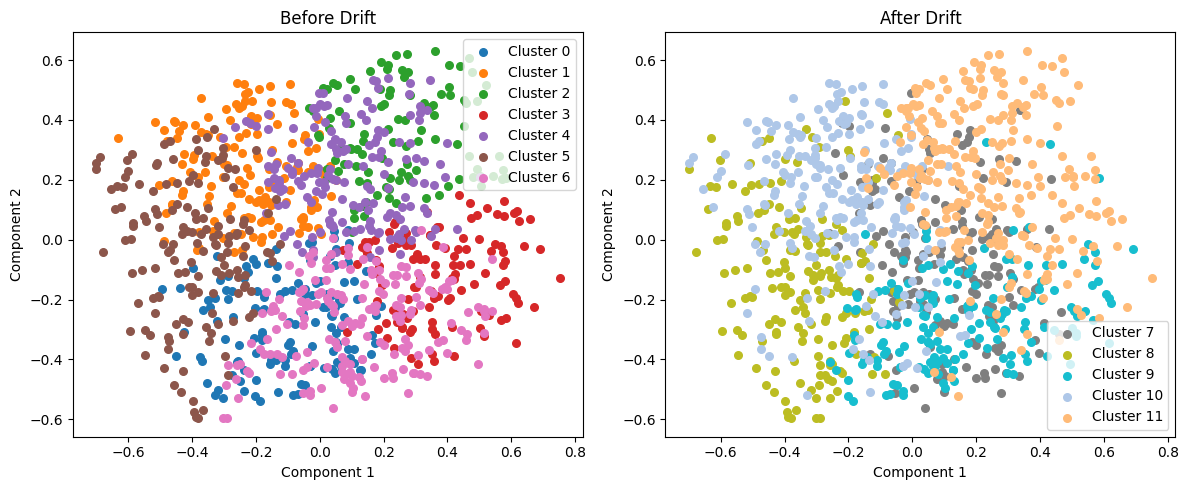

In [15]:
plot_drift_clustered(X_old, X_new, y_old, y_new, labels_old, labels_new)

### **3.2. Drift clustered - each class separately**

This ensures better readability than previous visualization

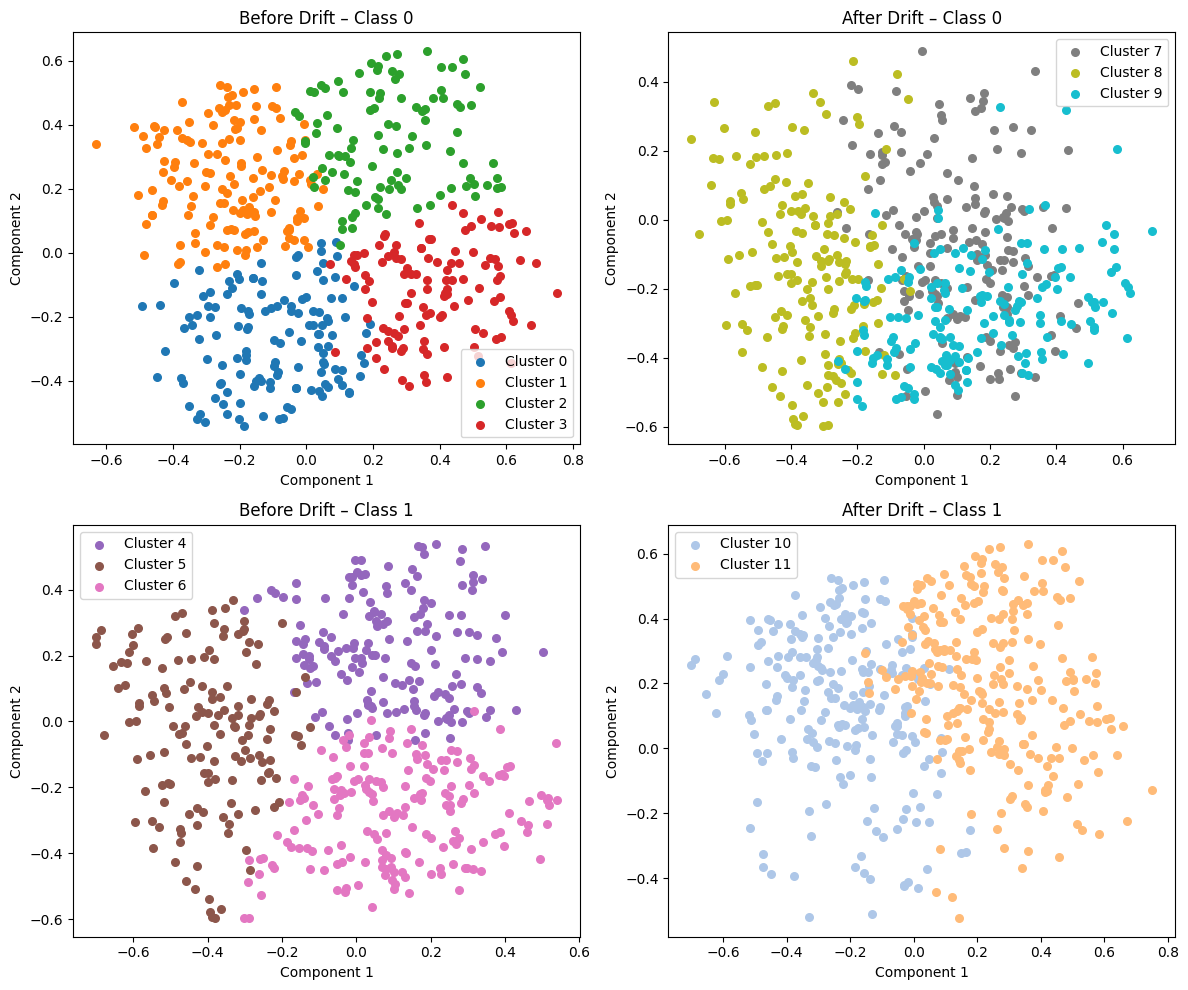

In [16]:
plot_clusters_by_class(X_old, X_new, y_old, y_new, labels_old, labels_new)

### **3.3. Plotting how much did clusters shift between data blocks**

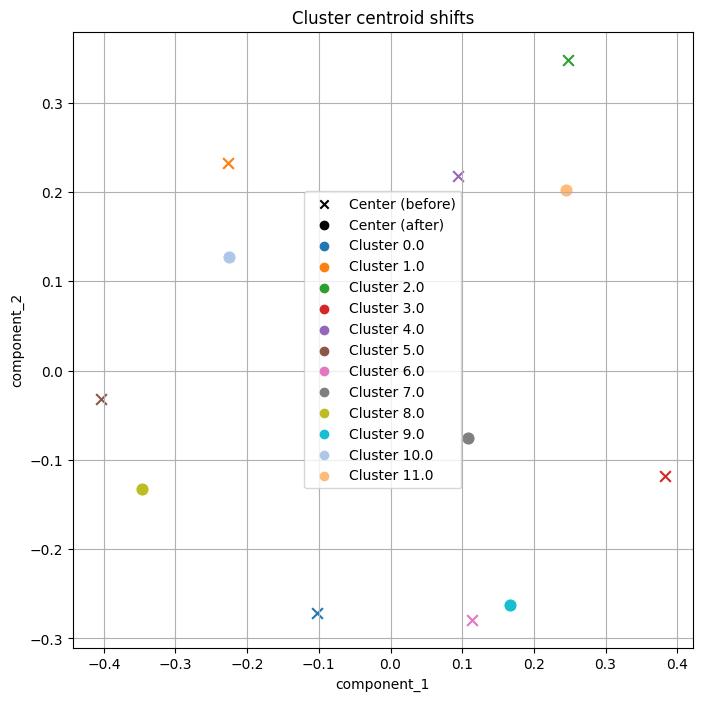

In [17]:
plot_centers_shift(X_old, X_new, y_old, y_new, labels_old, labels_new)

## **4. Experiments** ##

In [7]:
def run_experiment(experiment_fn):
    def wrapper(size_of_block, *args, **kwargs):

        X, y = experiment_fn(size_of_block, *args, **kwargs)

        X_old, X_new = X.loc[:size_of_block-1], X.loc[size_of_block:]
        y_old, y_new = y[:size_of_block], y[size_of_block:]

        CBDD = ClusterBasedDriftDetector(X_old, y_old, X_new, y_new)
        CBDD.detect()

        labels_old = CBDD.cluster_labels_old
        labels_new = CBDD.cluster_labels_new

        print(f"Drift detected?: {CBDD.drift_flag}, strength of drift: {CBDD.strength_of_drift}")

        plot_drift_clustered(X_old, X_new, y_old, y_new, labels_old, labels_new)
        plot_clusters_by_class(X_old, X_new, y_old, y_new, labels_old, labels_new)
        plot_centers_shift(X_old, X_new, y_old, y_new, labels_old, labels_new)

    return wrapper

@run_experiment
def run_experiments_hyperplane(size_of_block, nr_of_features, nr_of_drift_features):
    generator = get_dataset("hyperplane_drift")

    return generator.generate(
        size_of_block,
        size_of_block,
        nr_of_features,
        nr_of_drift_features
    )

#### **4.1. Hyperplane**

**1. Hyperplane 2D**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[ 2 62  5  5]
[ 0 18  3  3]
Drift detected?: True, strength of drift: 0.8124999999770235


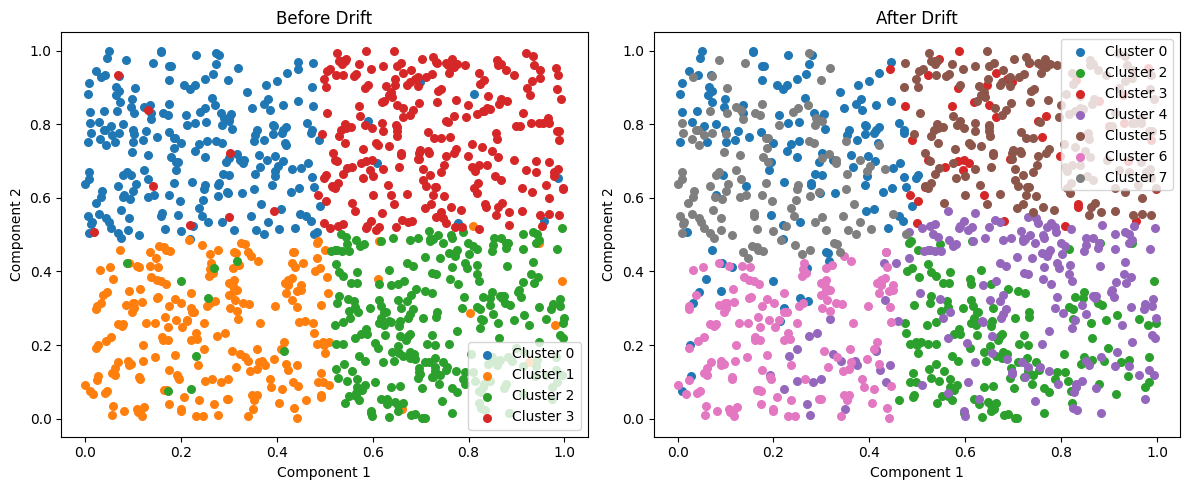

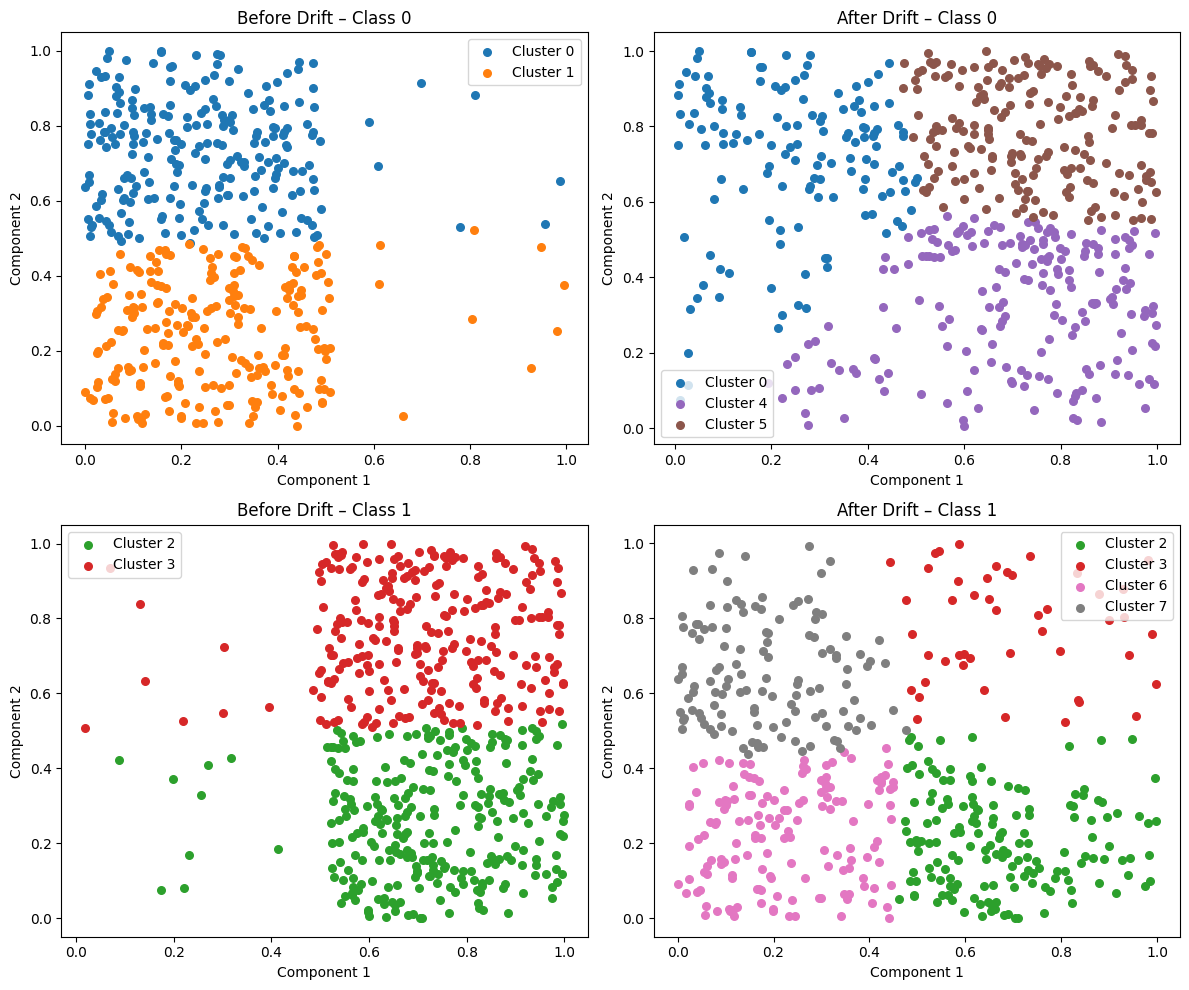

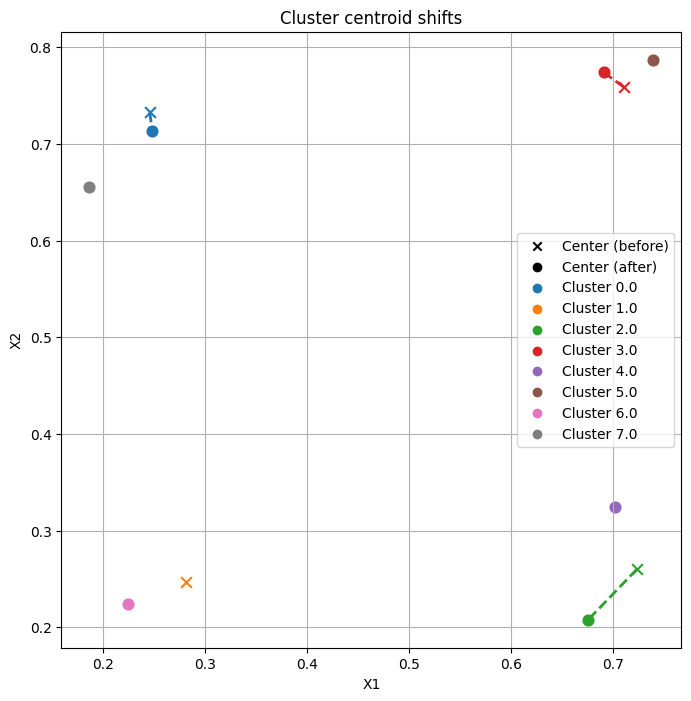

In [19]:
run_experiments_hyperplane(1000, 2, 2)

**2. Hyperplane 3D only with relevant features**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  2 172  11  11]
[0 8 1 1]
Drift detected?: True, strength of drift: 0.9597222221994159


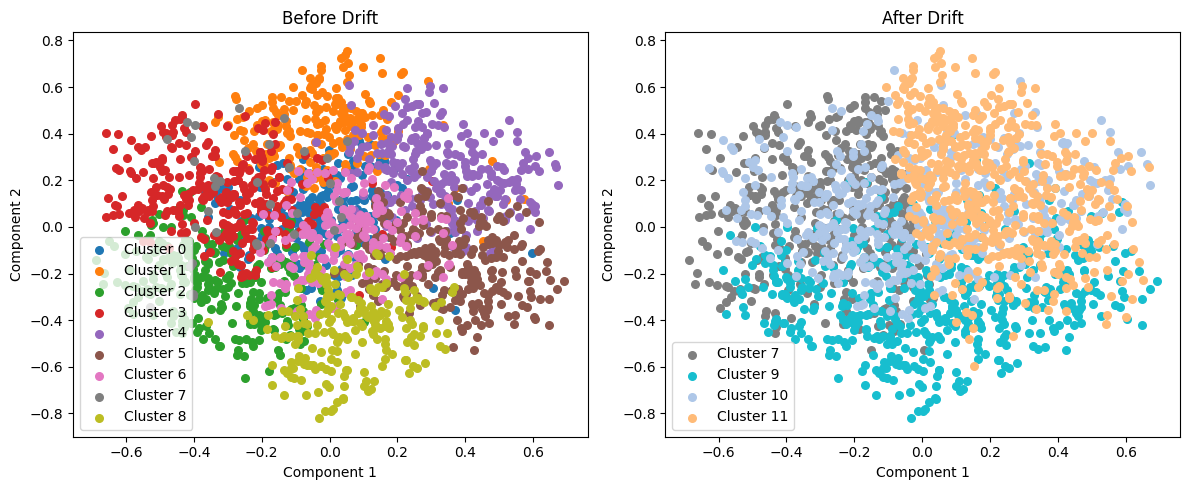

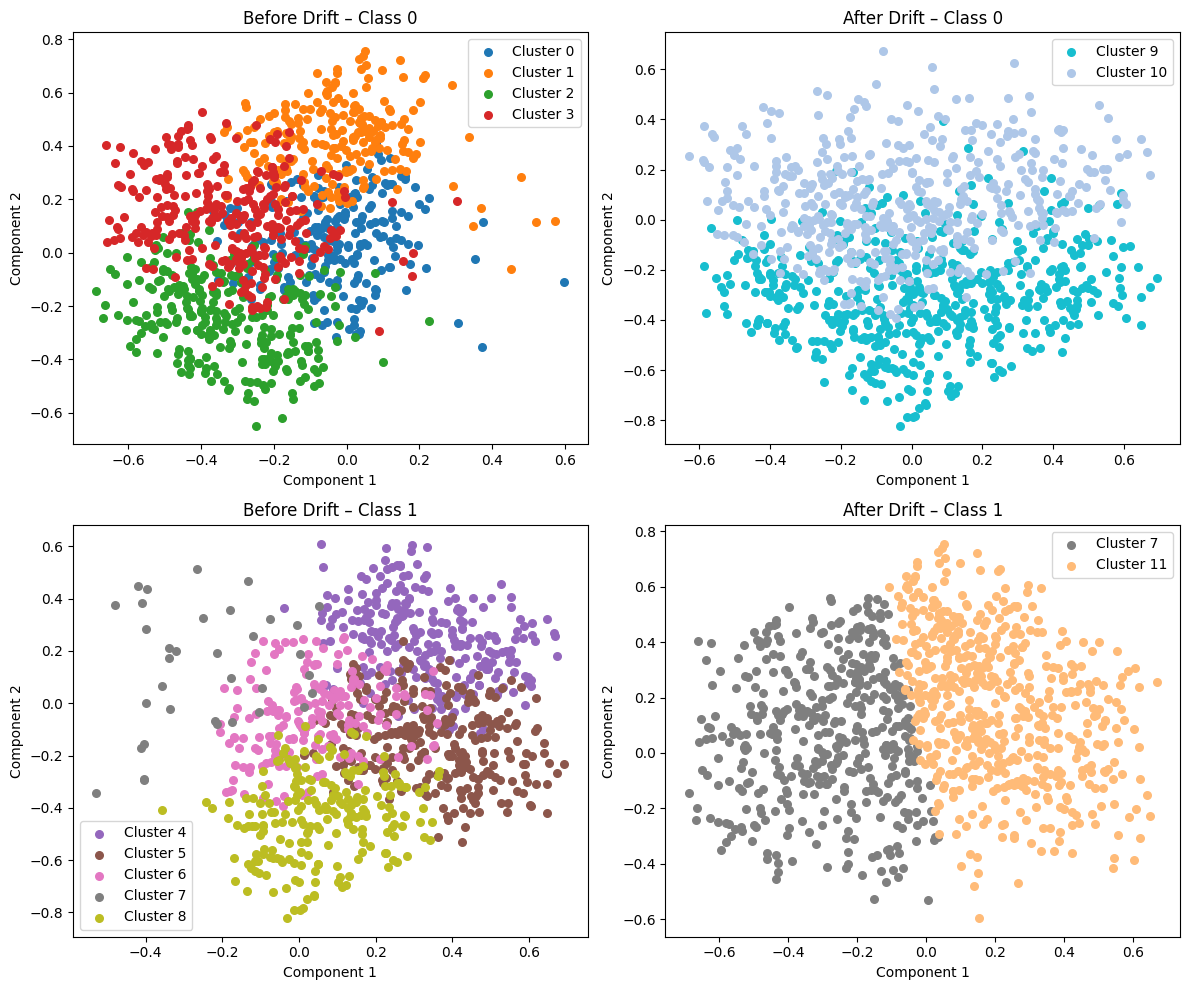

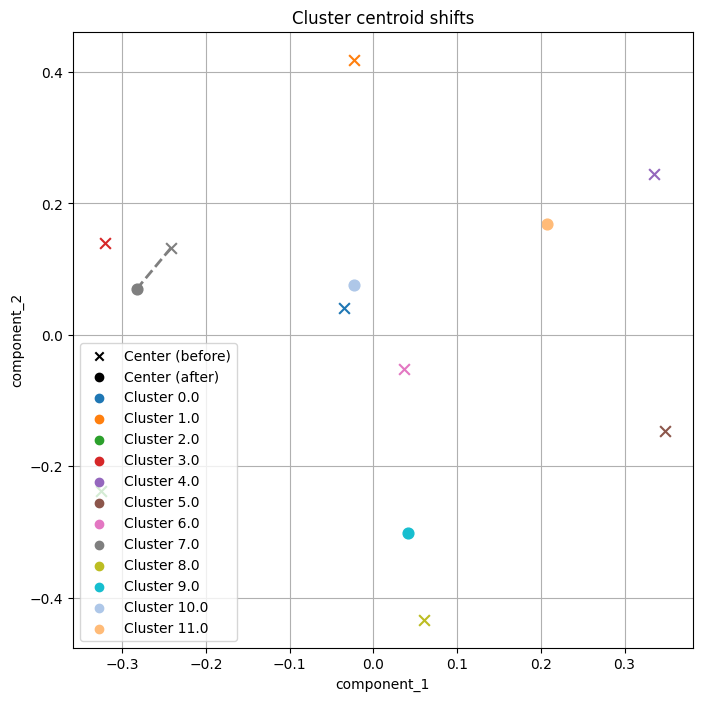

In [20]:
run_experiments_hyperplane(2000, 3, 3)

**3. Hyperplane 3D - not all features drift**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  2 225  15  15]
[0 0 0 0]
Drift detected?: True, strength of drift: 0.9999999999775556


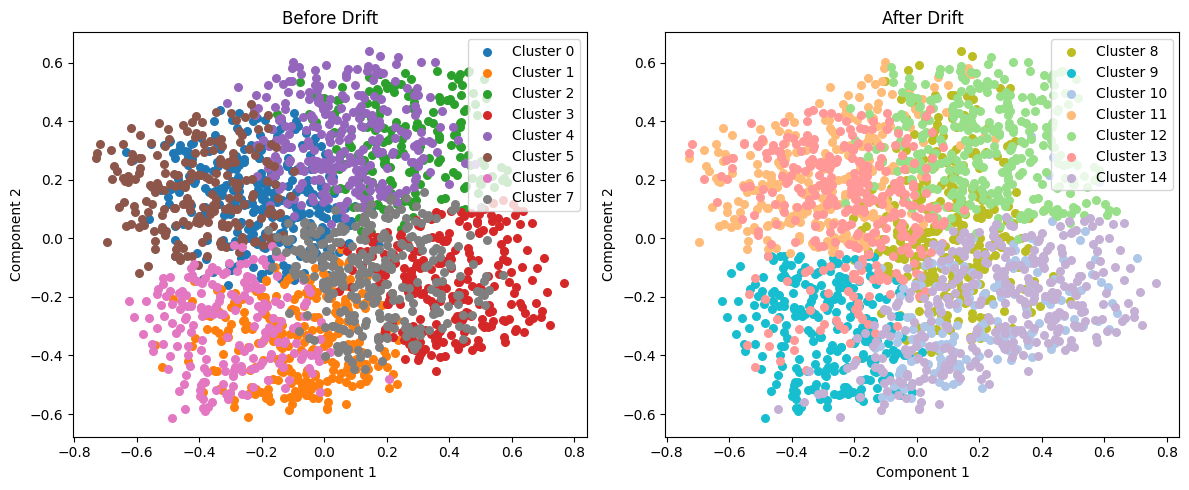

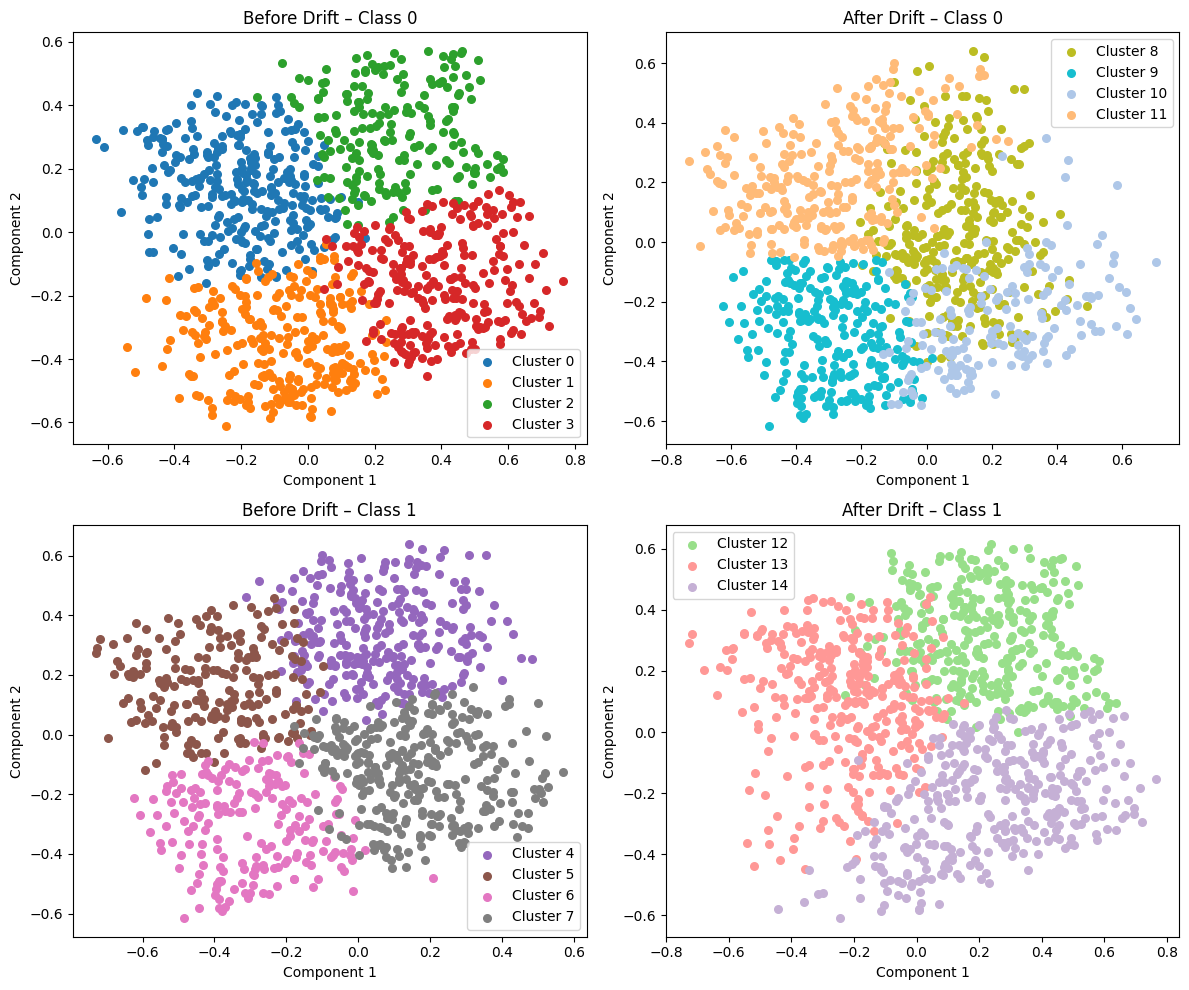

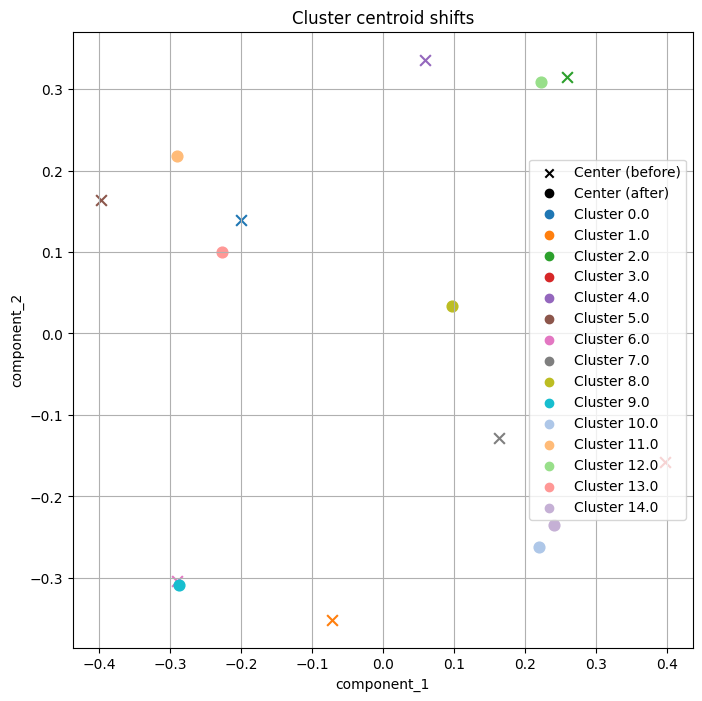

In [21]:
run_experiments_hyperplane(2000, 3, 2)

**4. Hyperplane multidimensional - not all features drift**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  2 160   7   6]
[ 0 15  0  1]
Drift detected?: True, strength of drift: 0.9642857142607877


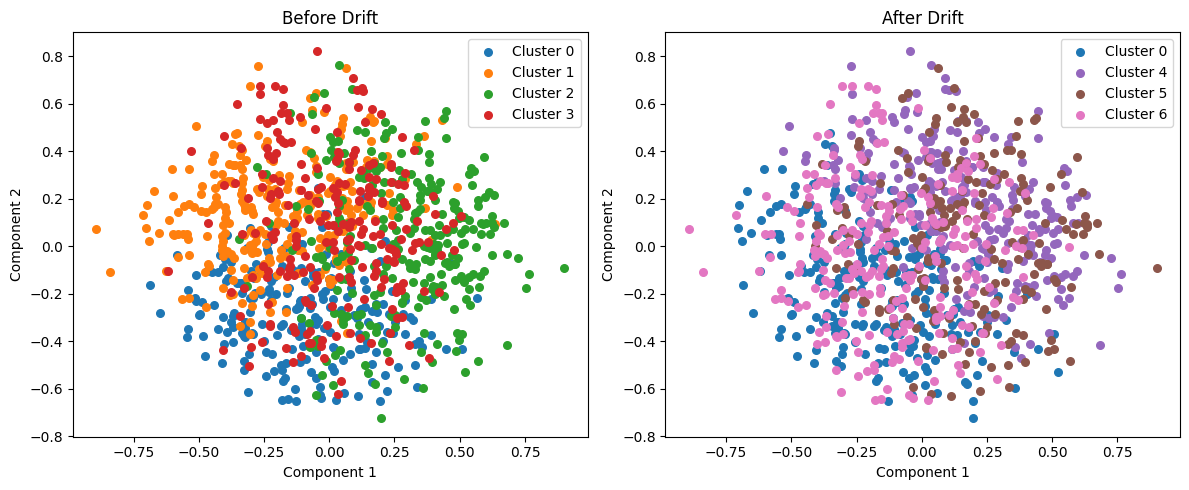

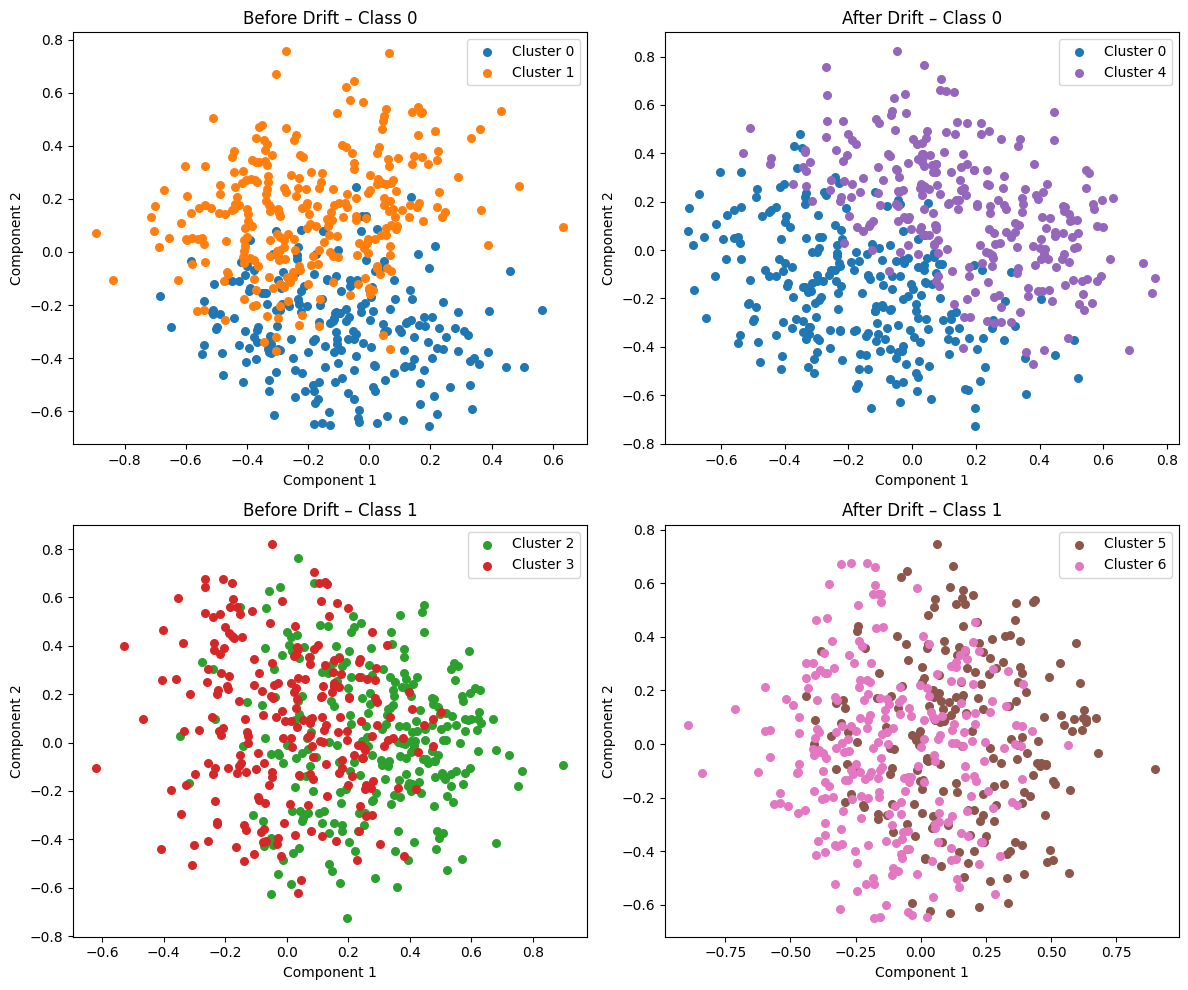

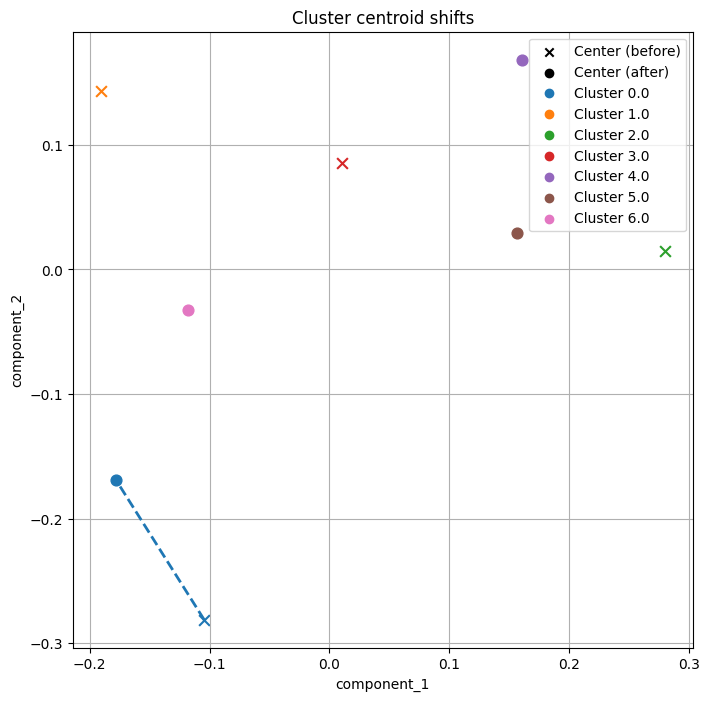

In [22]:
run_experiments_hyperplane(1000, 5, 2)

### **4.2. SEA**

**1. SEA - all features (including the irrelevant one)**

In [24]:
@run_experiment
def run_experiments_sea(size_of_block, nr_of_features):
    generator = get_dataset("sea_drift")

    return generator.generate(
        size_of_block,
        size_of_block,
        n_features = nr_of_features
    )

[0 0 1 2]
[2 0 3 2]
Drift detected?: False, strength of drift: 0.1124999999971875


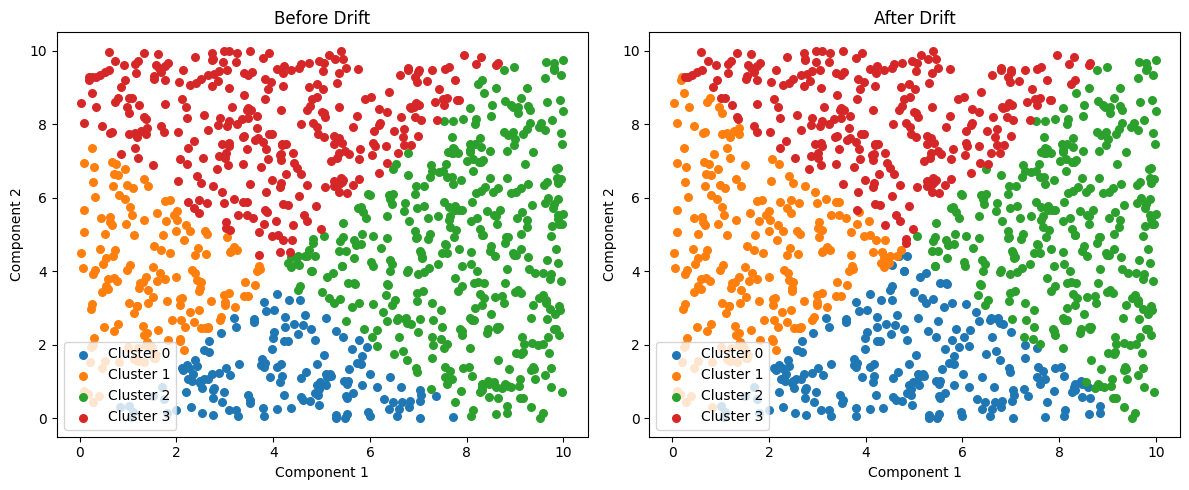

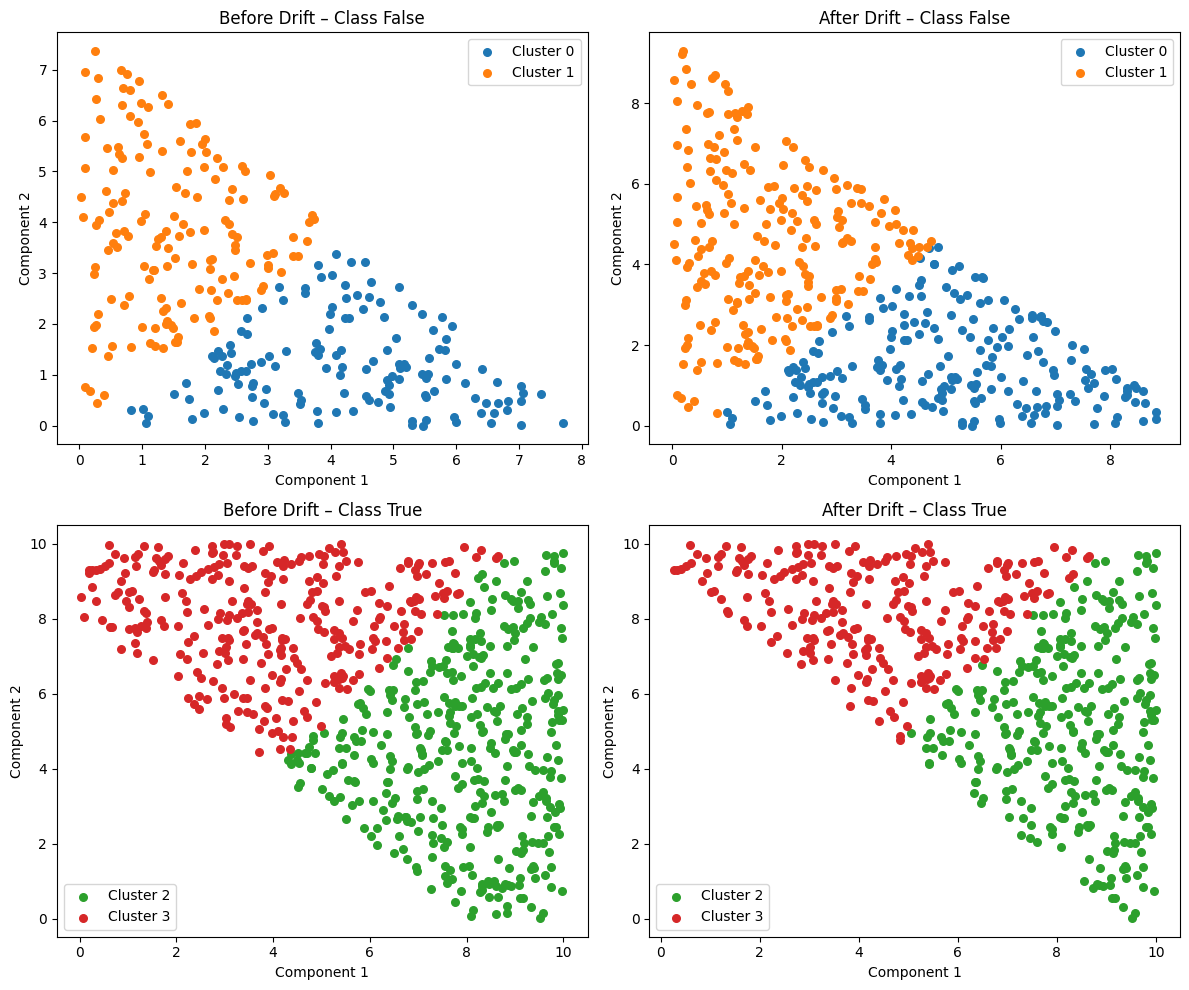

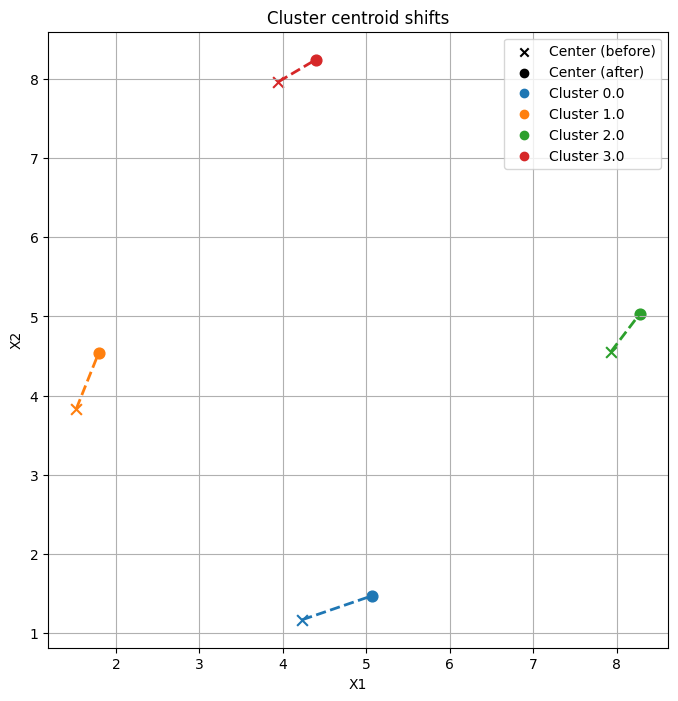

In [25]:
run_experiments_sea(1000, 2)

**2. SEA but only with all features**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  2 105   8   7]
[ 0 30  1  2]
Drift detected?: True, strength of drift: 0.8944444444209672


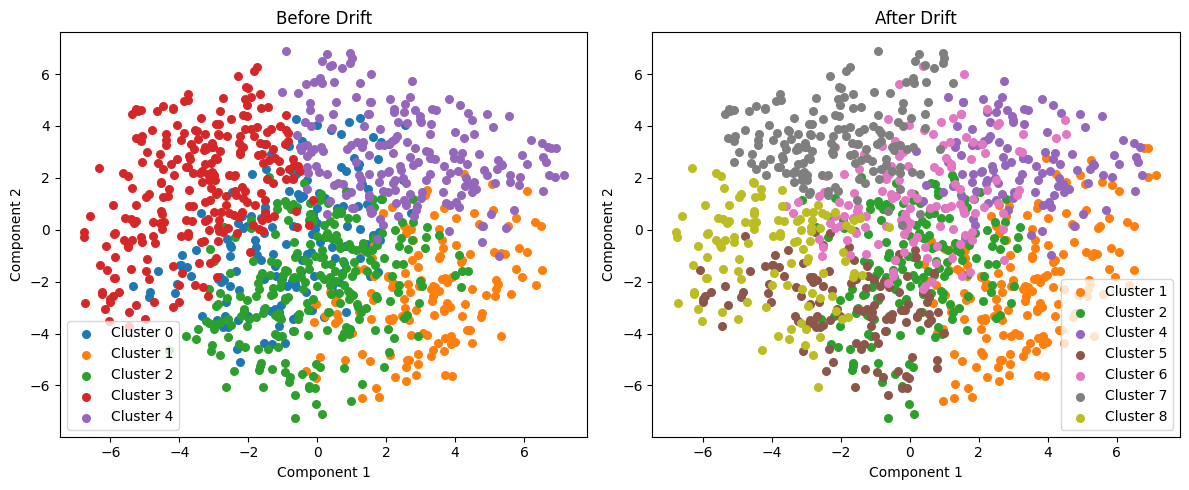

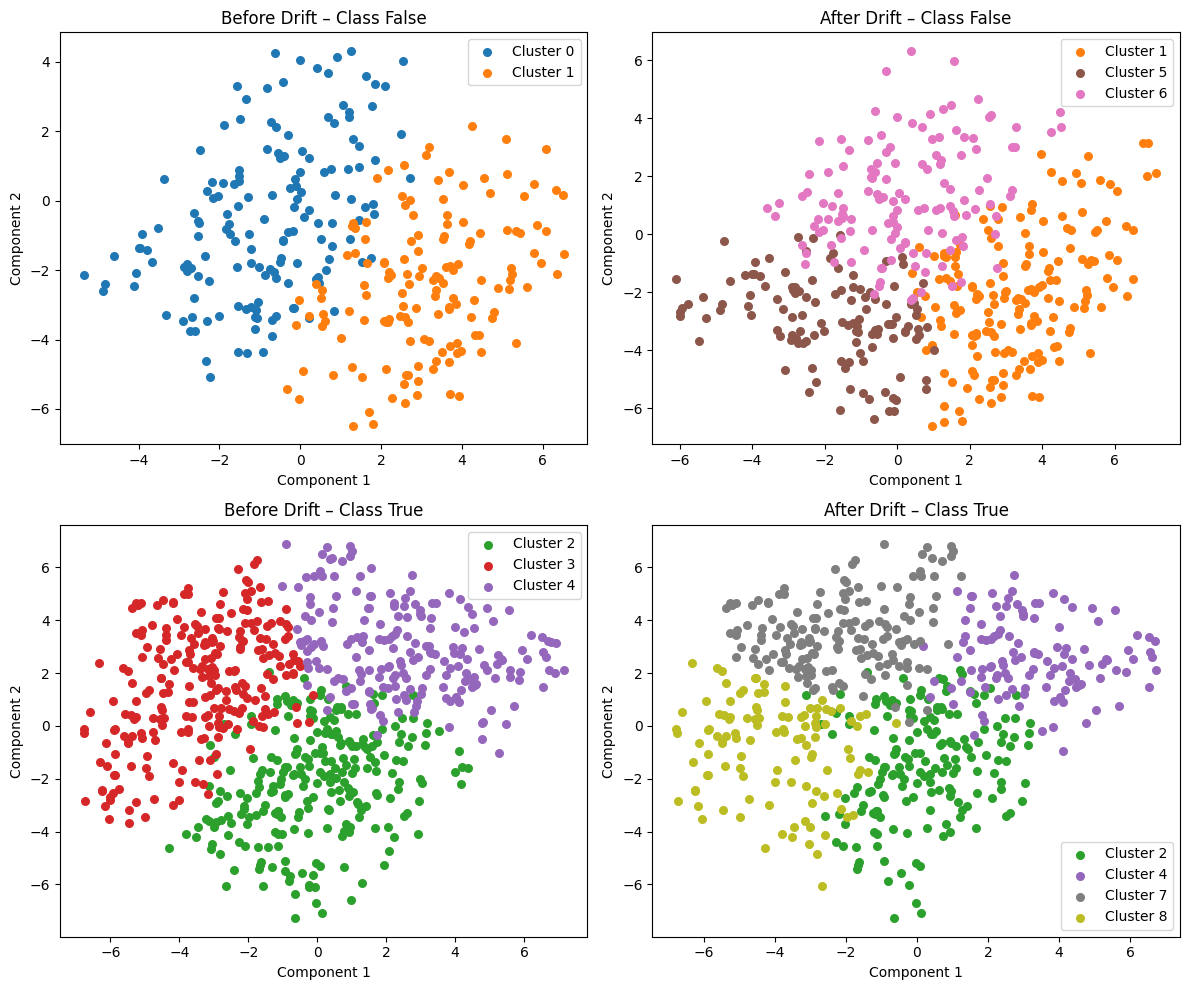

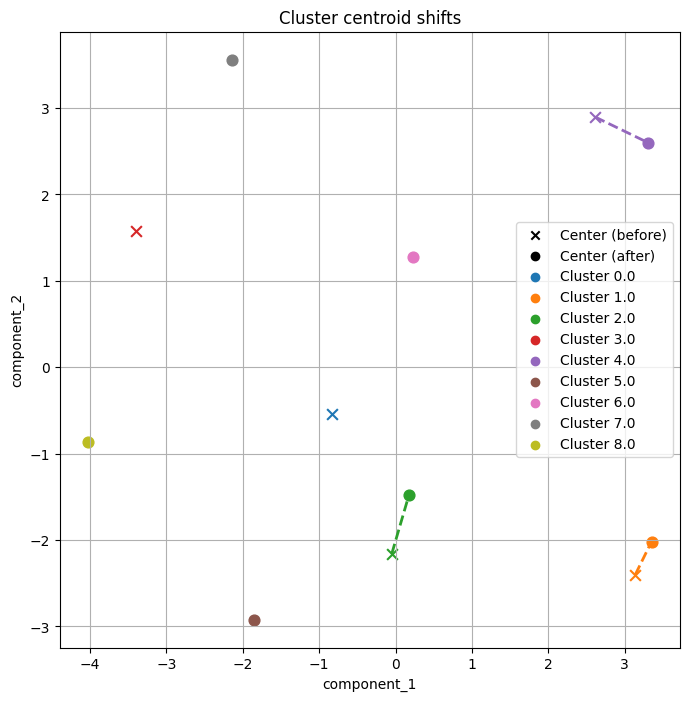

In [26]:
run_experiments_sea(1000, 3)

### **4.3. RBF**

In [27]:
@run_experiment
def run_experiments_random_rbf(size_of_block, nr_of_features):
    generator = get_dataset("random_rbf_drift")

    return generator.generate(
        size_of_block,
        size_of_block,
        n_features = nr_of_features
    )

In [ ]:
# run_experiments_random_rbf(1000, 2)

### **4.4. SDBM**


In [18]:
def run_experiment2(experiment_fn):
    def wrapper(size_of_block, *args, **kwargs):

        X, y = experiment_fn(size_of_block, *args, **kwargs)

        X_old, X_new = X.loc[:size_of_block-1], X.loc[size_of_block:]
        y_old, y_new = y[:size_of_block], y[size_of_block:]

        CBDD = ClusterBasedDriftDetector(X_old, y_old, X_new, y_new)
        CBDD.detect()

        labels_old = CBDD.cluster_labels_old
        labels_new = CBDD.cluster_labels_new
        print(CBDD.centers_old)
        print(CBDD.centers_new)

        print(f"Drift detected?: {CBDD.drift_flag}, strength of drift: {CBDD.strength_of_drift}")

        plot_drift_clustered(X_old, X_new, y_old, y_new, labels_old, labels_new)
        plot_clusters_by_class(X_old, X_new, y_old, y_new, labels_old, labels_new)
        plot_centers_shift(X_old, X_new, y_old, y_new, labels_old, labels_new)

    return wrapper

In [19]:
@run_experiment2
def run_experiments_sdbm(size_of_block, drift_width):
    generator = get_dataset("sdbm_rbf_drift")

    return generator.generate(
        size_of_block,
        size_of_block,
        drift_width=drift_width
    )


**1. SDBM with drift_width=0**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  2 160   8   8]
[0 0 0 0]
{np.float64(0.0): array([-0.94697048,  0.98531957, -0.98487079,  0.96980732]), np.float64(1.0): array([ 1.01983293, -0.98329609,  0.9896753 , -1.02281129]), np.float64(2.0): array([-0.9562982 , -0.99632763,  0.99136204,  0.93230516]), np.float64(3.0): array([ 1.02551119,  0.97868112, -0.98025111, -1.02167891]), np.float64(4.0): None, np.float64(5.0): None, np.float64(6.0): None, np.float64(7.0): None}
{np.float64(4.0): array([ 1.01892208,  0.96434393, -0.99000035, -1.0322182 ]), np.float64(5.0): array([-0.95279341, -0.97465101,  1.00490177,  0.9575483 ]), np.float64(6.0): array([ 1.0108419 , -0.98597284,  1.00393407, -1.01646504]), np.float64(7.0): array([-0.94919028,  0.97791135, -0.97098354,  0.93484152]), np.float64(0.0): None, np.float64(1.0): None, np.float64(2.0): None, np.float64(3.0): None}
Drift detected?: True, strength of drift: 0.9999999999754688


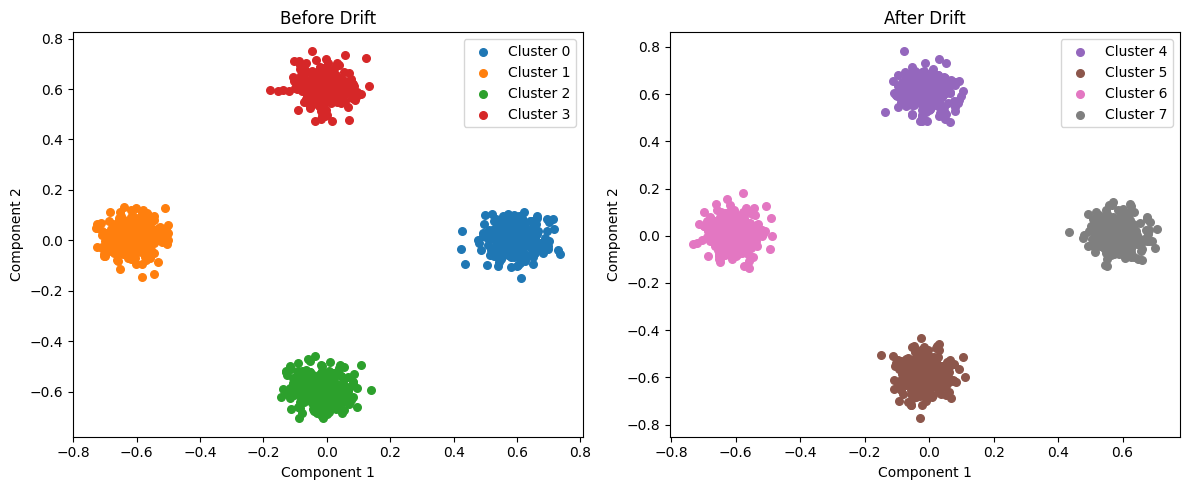

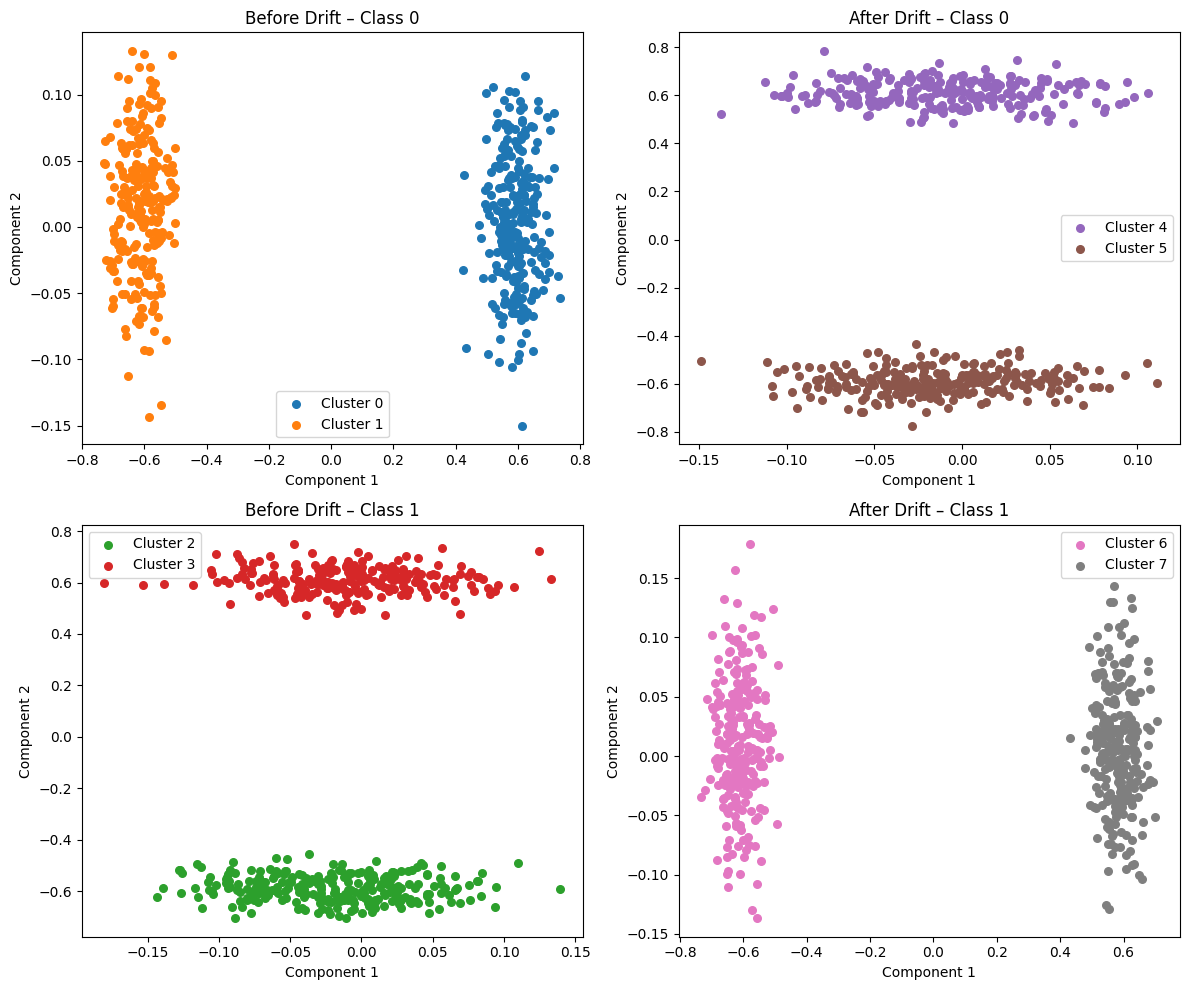

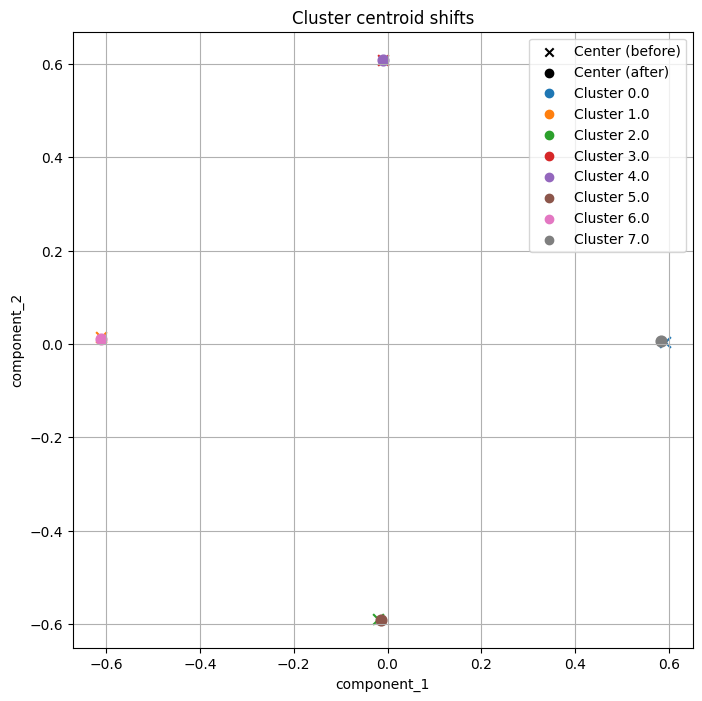

In [20]:
run_experiments_sdbm(1000, 0)

**2. SDBM with drift_width > 0**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)
/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:797: RuntimeWarning: divide by zero encountered in scalar divide
  (self.avg_distance_new[i] - self.avg_distance_old[i]) / self.avg_distance_old[i]


[  2 174   5   7]
[ 0 66  7  5]
{np.float64(0.0): array([-0.94086419,  0.98496584, -0.98480077,  0.96823418]), np.float64(1.0): array([ 1.10429299,  1.06090163, -1.05044237, -1.01636473]), np.float64(2.0): array([ 1.04630581,  1.12507825, -1.18712944, -1.27897489]), np.float64(3.0): array([ 1.0249801 , -0.98627946,  0.98931961, -1.03010889]), np.float64(4.0): array([-0.9825199 , -0.80086303,  0.97600176,  0.90169943]), np.float64(5.0): array([-0.94971579, -0.99718357,  0.99214255,  0.92688648]), np.float64(6.0): array([-1.02233205,  1.02467933, -1.00725098,  0.62982251]), np.float64(7.0): array([ 1.03265364,  0.97757084, -0.97906486, -1.02551122]), np.float64(8.0): None, np.float64(9.0): None, np.float64(10.0): None, np.float64(11.0): None}
{np.float64(0.0): array([-0.94198872,  1.08470253, -0.95888896,  0.88580653]), np.float64(1.0): array([ 1.02461306,  0.96441441, -0.99041058, -1.03825525]), np.float64(3.0): array([ 1.11116419, -0.94191468,  0.99914774, -1.08422956]), np.float64(4.0

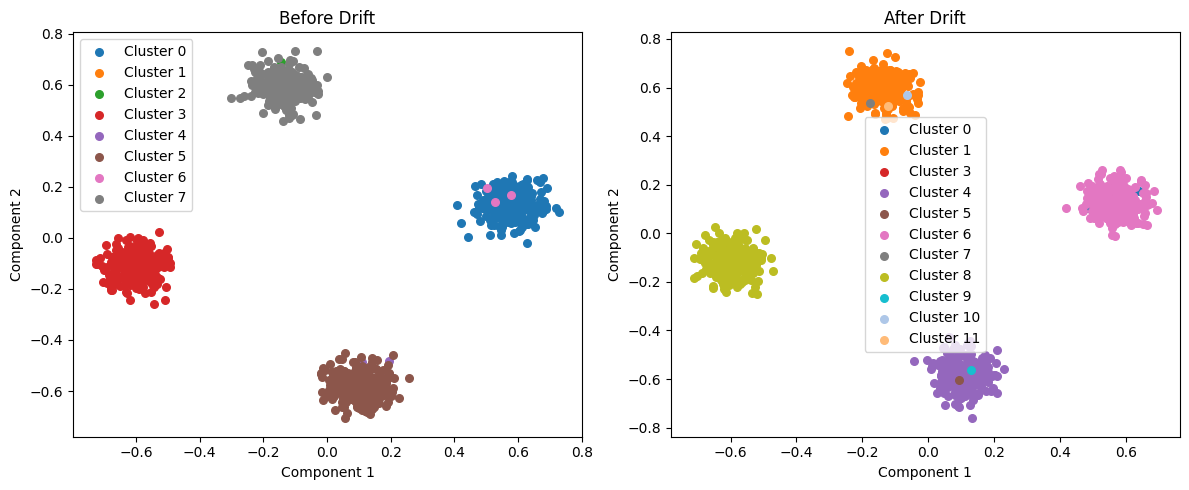

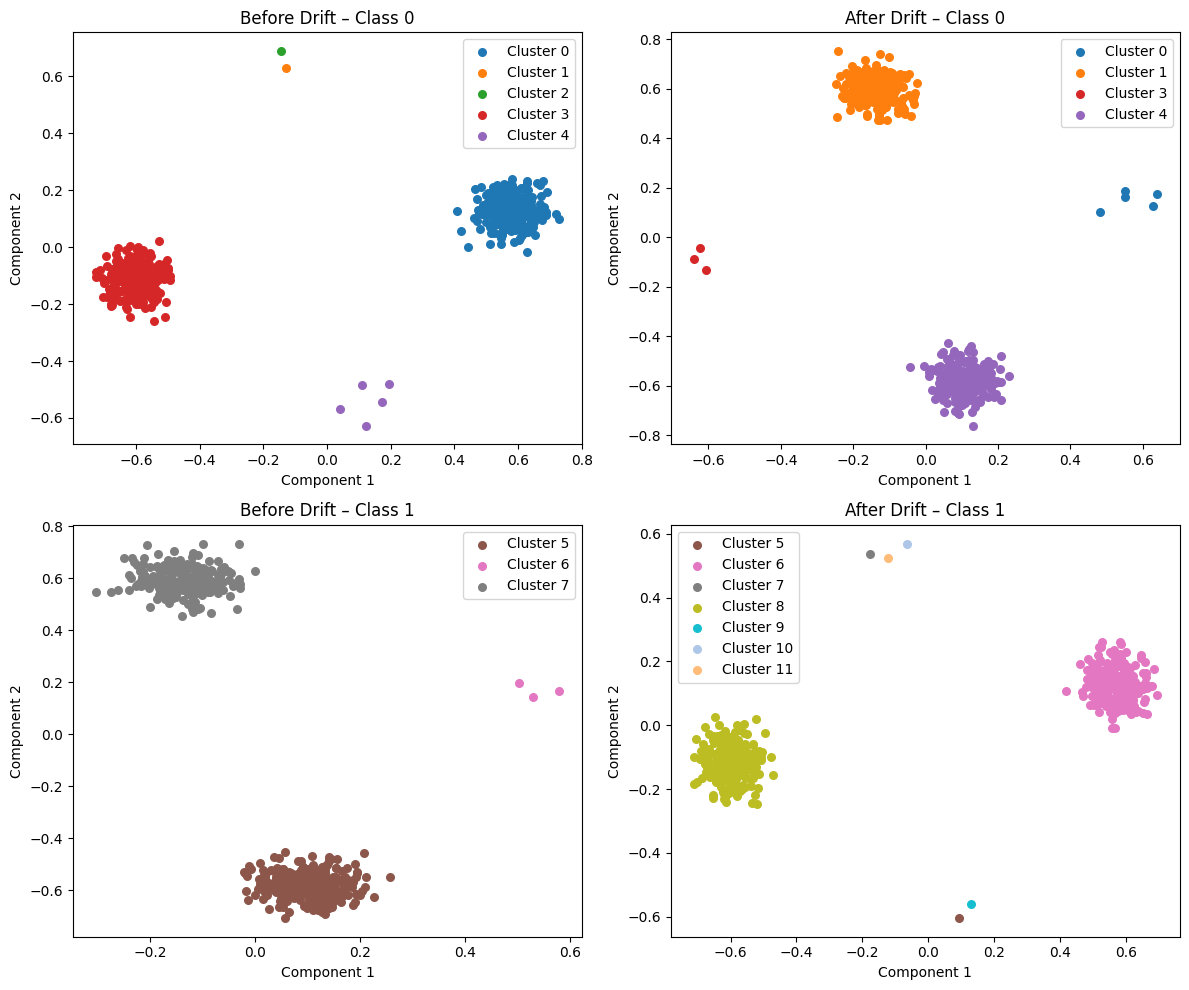

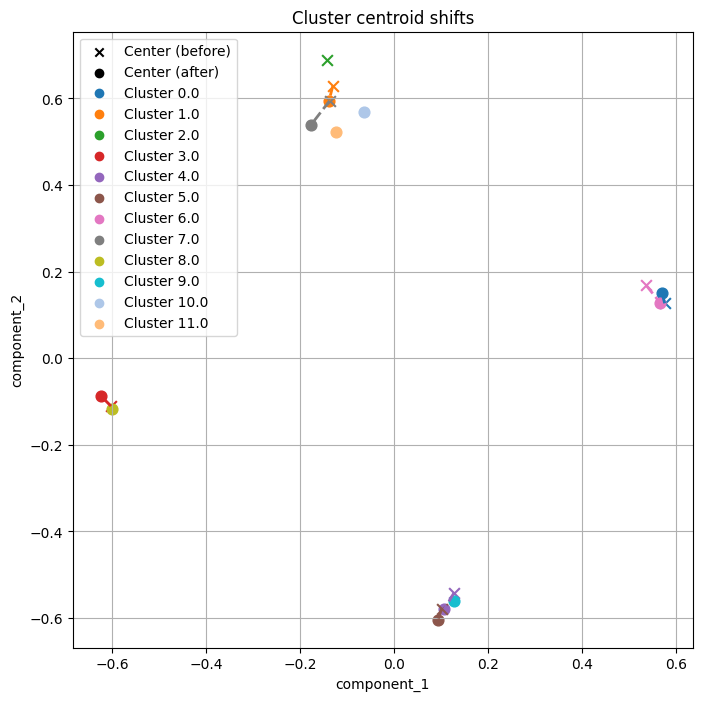

In [21]:
run_experiments_sdbm(1000, 50)

### **4.5. Controlled Concept Drift**

In [29]:
@run_experiment2
def run_experiments_controlled_concept_drift(size_of_block, n_features, n_drift_features):
    generator = get_dataset("controlled_concept_drift")

    return generator.generate(
        size_of_block, 
        size_of_block, 
        n_features, 
        n_drift_features
    )

**1. 2D Custom Concept Drift**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  2 110  11  11]
[0 0 0 0]
{np.float64(0.0): array([-0.83058355, -0.16723955]), np.float64(1.0): array([-1.2693987 ,  0.95359391]), np.float64(2.0): array([-1.03547696, -1.27226303]), np.float64(3.0): array([ 0.51278371, -1.16493504]), np.float64(4.0): array([-0.10947536,  1.06001247]), np.float64(5.0): array([1.15172134, 0.09157232]), np.float64(6.0): None, np.float64(7.0): None, np.float64(8.0): None, np.float64(9.0): None, np.float64(10.0): None}
{np.float64(6.0): array([0.92495087, 0.94213751]), np.float64(7.0): array([ 1.06466298, -0.47675701]), np.float64(8.0): array([-0.51451113,  1.13543642]), np.float64(9.0): array([ 3.4935411e-04, -1.1724691e+00]), np.float64(10.0): array([-1.0900353 ,  0.04310906]), np.float64(0.0): None, np.float64(1.0): None, np.float64(2.0): None, np.float64(3.0): None, np.float64(4.0): None, np.float64(5.0): None}
Drift detected?: True, strength of drift: 0.999999999976591


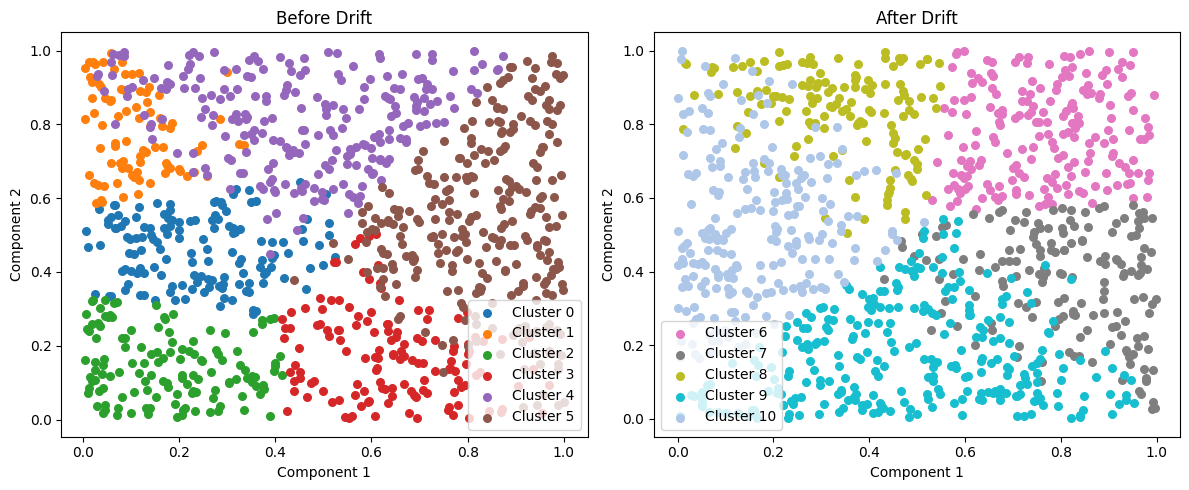

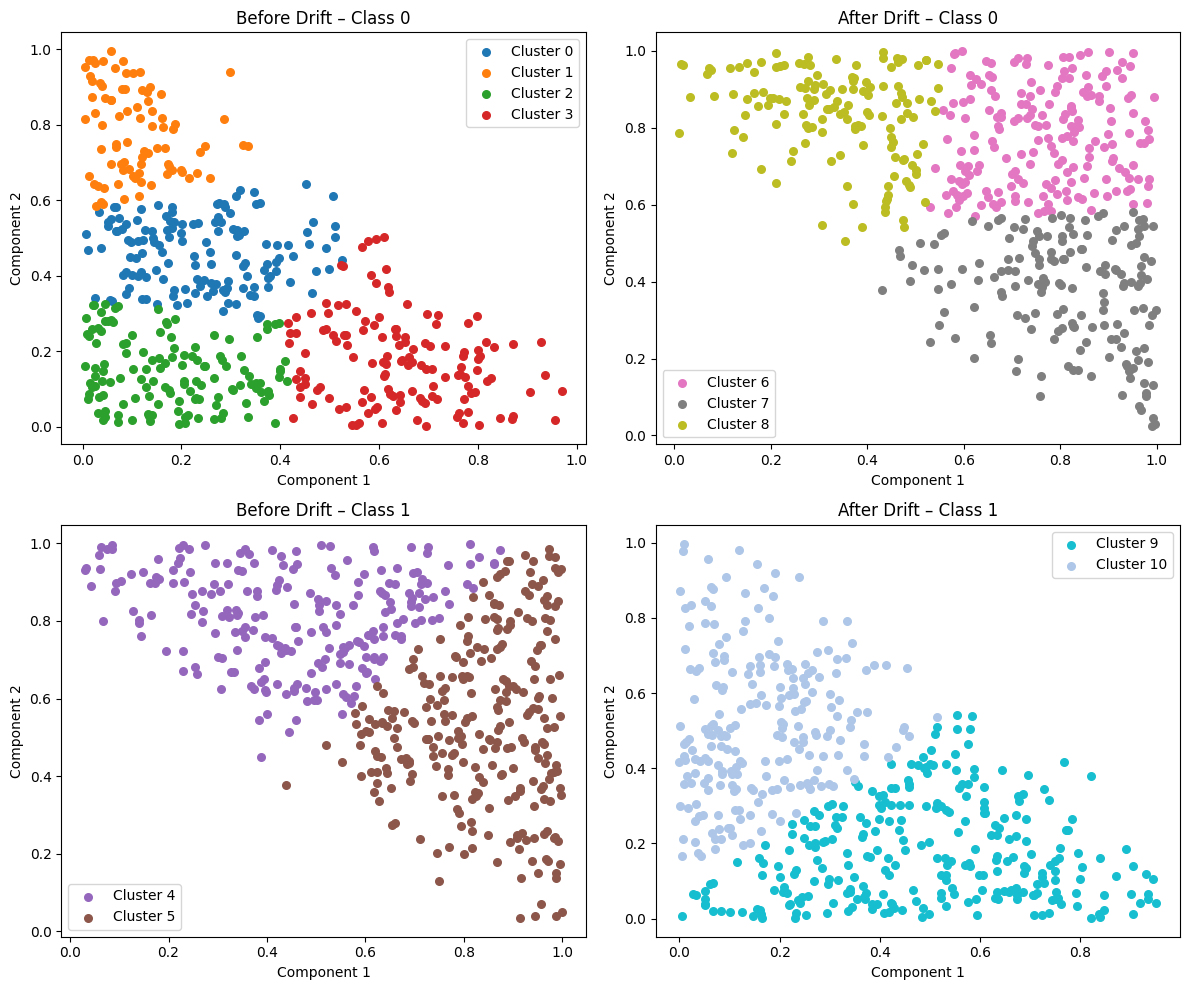

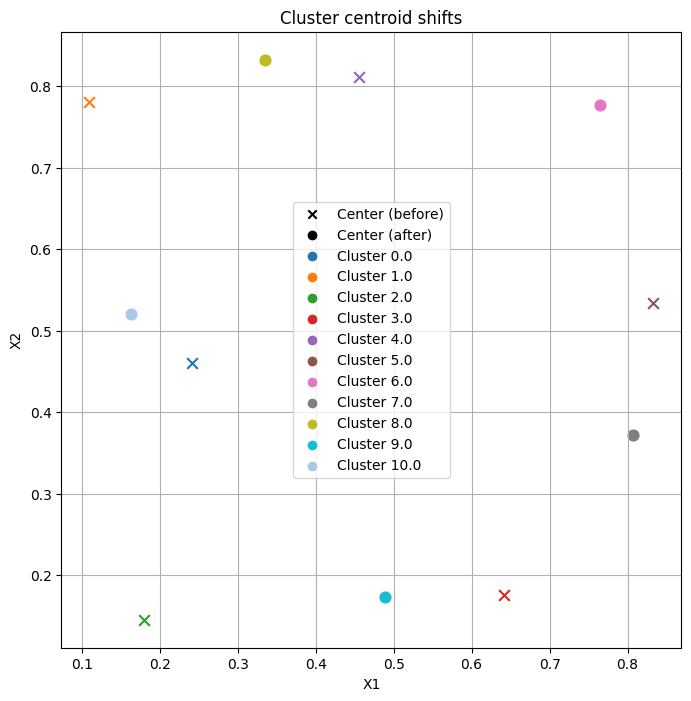

In [ ]:
run_experiments_controlled_concept_drift(1000, 2, 2)

**2. Higher Dimensions Custom Concept Drift**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  2 133   7   6]
[0 7 0 1]
{np.float64(0.0): array([-0.34353504, -1.03212262, -0.01274769, -0.2807745 ]), np.float64(1.0): array([-0.54557864,  0.44379787, -0.92333755, -0.48876697]), np.float64(2.0): array([-0.29545489,  0.7747544 ,  0.23328306,  0.76687209]), np.float64(3.0): array([1.03539675, 0.05100744, 0.53127994, 0.00846064]), np.float64(4.0): None, np.float64(5.0): None, np.float64(6.0): None}
{np.float64(2.0): array([-0.55794466,  0.41164856,  0.88849534,  0.35730744]), np.float64(4.0): array([ 0.54656946,  0.53719062, -0.84592521,  0.35077221]), np.float64(5.0): array([ 0.20433619,  0.28723885, -0.04159823, -1.09708599]), np.float64(6.0): array([-0.27205744, -1.05858365,  0.0086939 ,  0.3637704 ]), np.float64(0.0): None, np.float64(1.0): None, np.float64(3.0): None}
Drift detected?: True, strength of drift: 0.9732142856893201


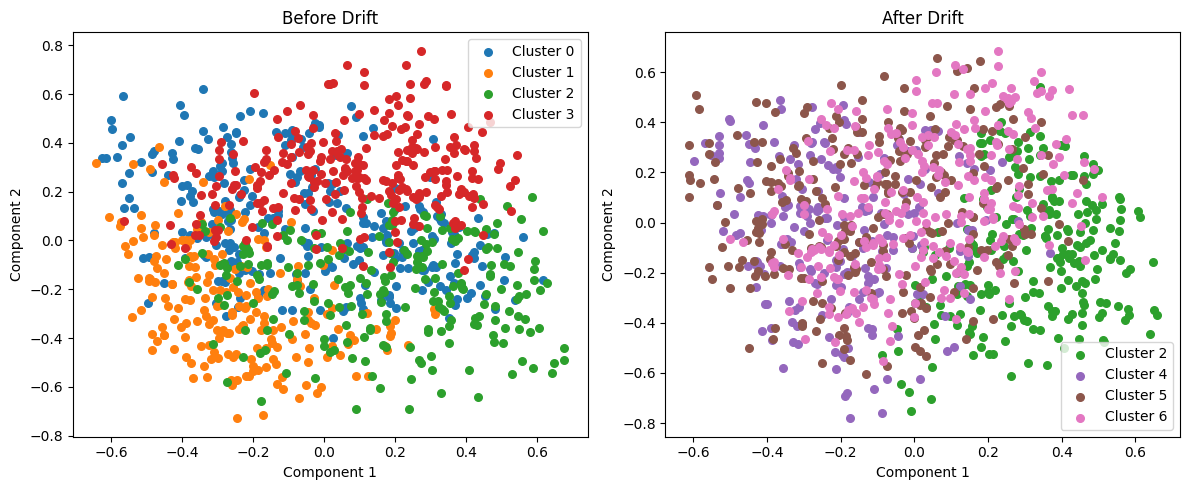

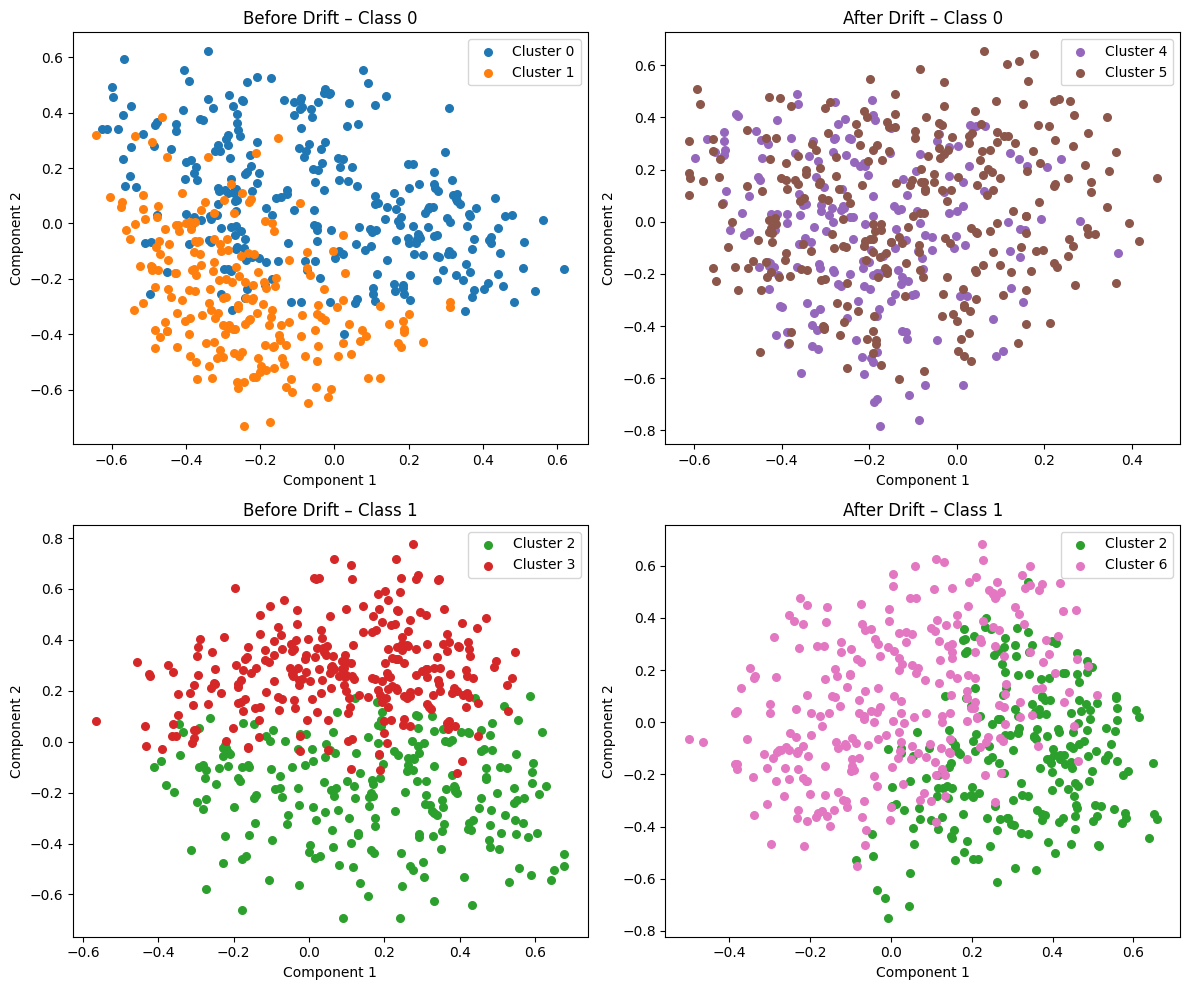

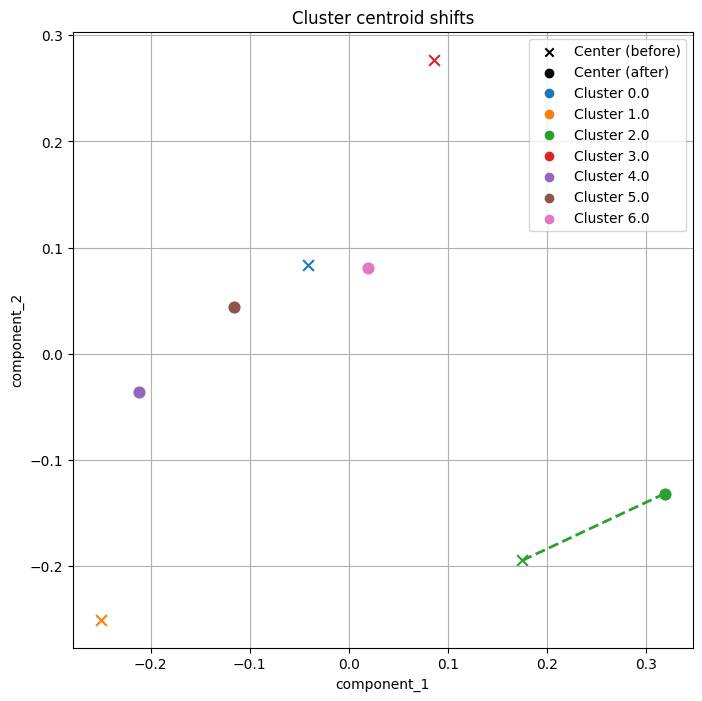

In [31]:
run_experiments_controlled_concept_drift(1000, 4, 2)

**3. Custom concept Drift Default Parameters**

/Users/Kuba/Desktop/DriftDetectionWithExplainableAI/src/clustering/clustering.py:678: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stats_combined.fillna('-', inplace=True)


[  1 174   5   2]
[  1 101   0   3]
{np.float64(0.0): array([-0.33174208, -0.05761286, -0.41598523, -0.51601243, -0.17385945,
       -0.31704783,  0.54917682,  0.03251214, -0.47485473, -0.34816057,
       -0.31208892]), np.float64(1.0): array([-0.1980968 , -0.31964246, -0.06965707,  0.03802117, -0.27052724,
       -0.26764715, -0.88766016, -0.4216938 , -0.02728749, -0.03975123,
       -0.21072974]), np.float64(2.0): array([ 0.22463781,  0.14440005,  0.19835472,  0.01975053,  0.38738164,
        0.18895801,  0.13475208,  0.17040478,  0.38367829, -0.01515706,
        0.99205315]), np.float64(3.0): array([ 0.35907512,  0.29387147,  0.32580034,  0.51822099,  0.07534731,
        0.47194265,  0.32362685,  0.28771395,  0.11895393,  0.46552709,
       -0.56281862]), np.float64(4.0): None}
{np.float64(1.0): array([ 0.26843816, -0.0227547 ,  0.28262771,  0.23691721,  0.17528387,
       -0.37976224, -0.28488557,  0.09831074, -0.67632423, -0.58745249,
        0.00981659]), np.float64(2.0): array([

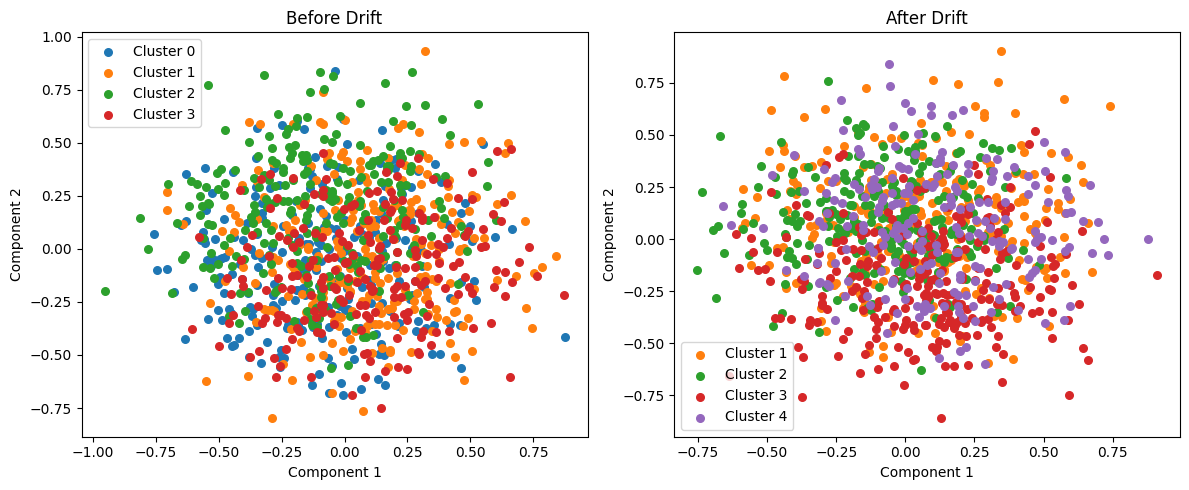

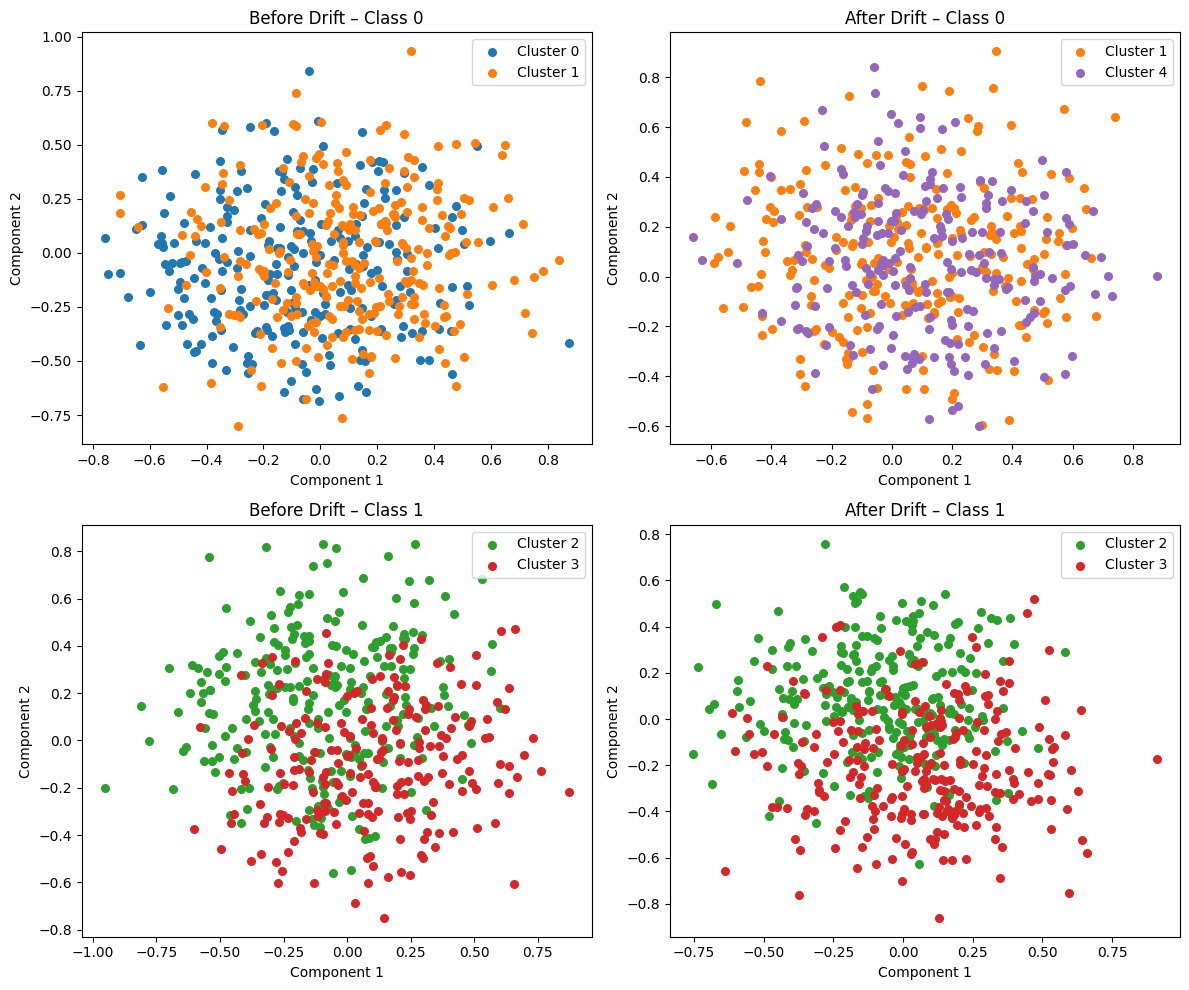

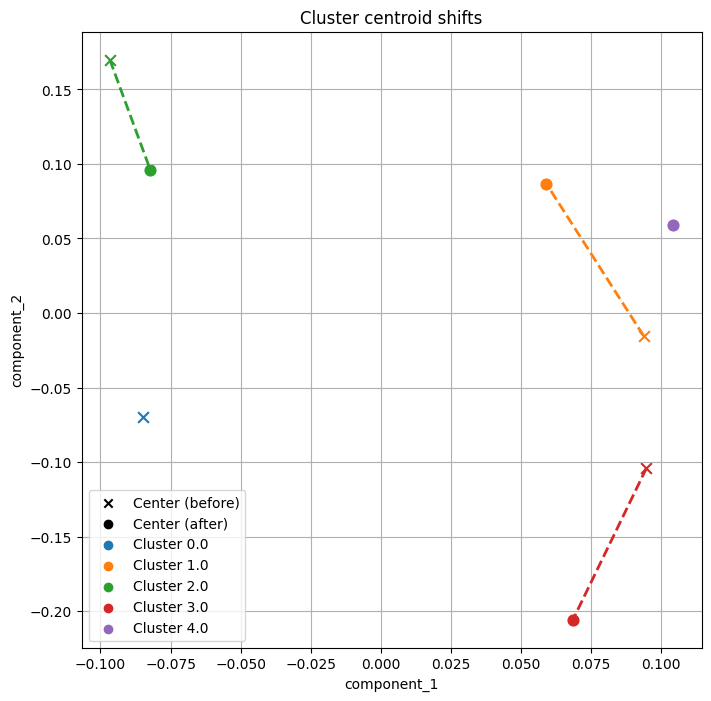

In [32]:
run_experiments_controlled_concept_drift(1000, 11, 5)